In [8]:
#Loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
random.seed(42)
np.random.seed(42)
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from tabulate import tabulate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_auc_score,confusion_matrix

In [10]:
#loading dataset
df = pd.read_csv('telecom_churn_data.csv')
df

,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,...,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,345-7512,no,yes,25,144.0,81,24.48,...,112,15.91,158.6,122,7.14,8.5,6,2.30,3,False.
4613,NM,177,408,343-6820,no,yes,29,189.0,91,32.13,...,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,...,129,25.17,200.9,91,9.04,13.0,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,...,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.


In [11]:
# List of actual column names from the business case
new_column_names = [
    'State', 'Account Length', 'Area Code', 'Phone', 'International Plan', 
    'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 
    'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 
    'Night Charge', 'International Mins', 'International Calls', 
    'International Charge', 'CustServ Calls', 'Churn'
]

# Renaming the columns
df.columns = new_column_names

In [12]:
df

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,345-7512,no,yes,25,144.0,81,24.48,...,112,15.91,158.6,122,7.14,8.5,6,2.30,3,False.
4613,NM,177,408,343-6820,no,yes,29,189.0,91,32.13,...,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,...,129,25.17,200.9,91,9.04,13.0,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,...,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.


In [13]:
#dropping unnecessary columns
df.drop('Phone',axis =1,inplace = True)

# Basic Checks

In [14]:
df.head()

,State,Account Length,Area Code,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 4617 non-null   object 
 1   Account Length        4617 non-null   int64  
 2   Area Code             4617 non-null   int64  
 3   International Plan    4617 non-null   object 
 4   VMail Plan            4617 non-null   object 
 5   VMail Message         4617 non-null   int64  
 6   Day Mins              4617 non-null   float64
 7   Day Calls             4617 non-null   int64  
 8   Day Charge            4617 non-null   float64
 9   Eve Mins              4617 non-null   float64
 10  Eve Calls             4617 non-null   int64  
 11  Eve Charge            4617 non-null   float64
 12  Night Mins            4617 non-null   float64
 13  Night Calls           4617 non-null   int64  
 14  Night Charge          4617 non-null   float64
 15  International Mins   

In [16]:
df.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,100.645224,437.046350,7.849903,180.447152,100.054364,30.676576,200.429088,100.179770,17.036703,200.623933,99.944120,9.028185,10.279294,4.433831,2.775926,1.567035
std,39.597194,42.288212,13.592333,53.983540,19.883027,9.177145,50.557001,19.821314,4.297332,50.543616,19.935053,2.274488,2.757361,2.457615,0.744413,1.307019
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,165.900000,87.000000,14.100000,167.100000,87.000000,7.520000,8.600000,3.000000,2.320000,1.000000
50%,100.000000,415.000000,0.000000,180.000000,100.000000,30.600000,200.800000,101.000000,17.070000,200.800000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,17.000000,216.800000,113.000000,36.860000,234.000000,114.000000,19.890000,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [17]:
df.describe(include = 'O')

,State,International Plan,VMail Plan,Churn
count,4617,4617,4617,4617
unique,51,2,2,2
top,WV,no,no,False.
freq,149,4171,3381,3961


In [18]:
df.columns

Index(['State', 'Account Length', 'Area Code', 'International Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'International Mins', 'International Calls',
       'International Charge', 'CustServ Calls', 'Churn'],
      dtype='object')

In [19]:
df.shape

(4617, 20)

In [20]:
#separating categorical,dsicrete and numerical for eda

In [21]:
cat_discrete_col = df[['Churn','International Plan','VMail Plan','Area Code','CustServ Calls','State']]

In [22]:
cont_cols = df[['Account Length','Day Mins','Day Calls','Day Charge','Eve Mins','Eve Calls','Eve Charge','Night Mins','Night Calls','Night Charge','International Mins','International Calls','International Charge','VMail Message']]

# Exploratory Data Analysis

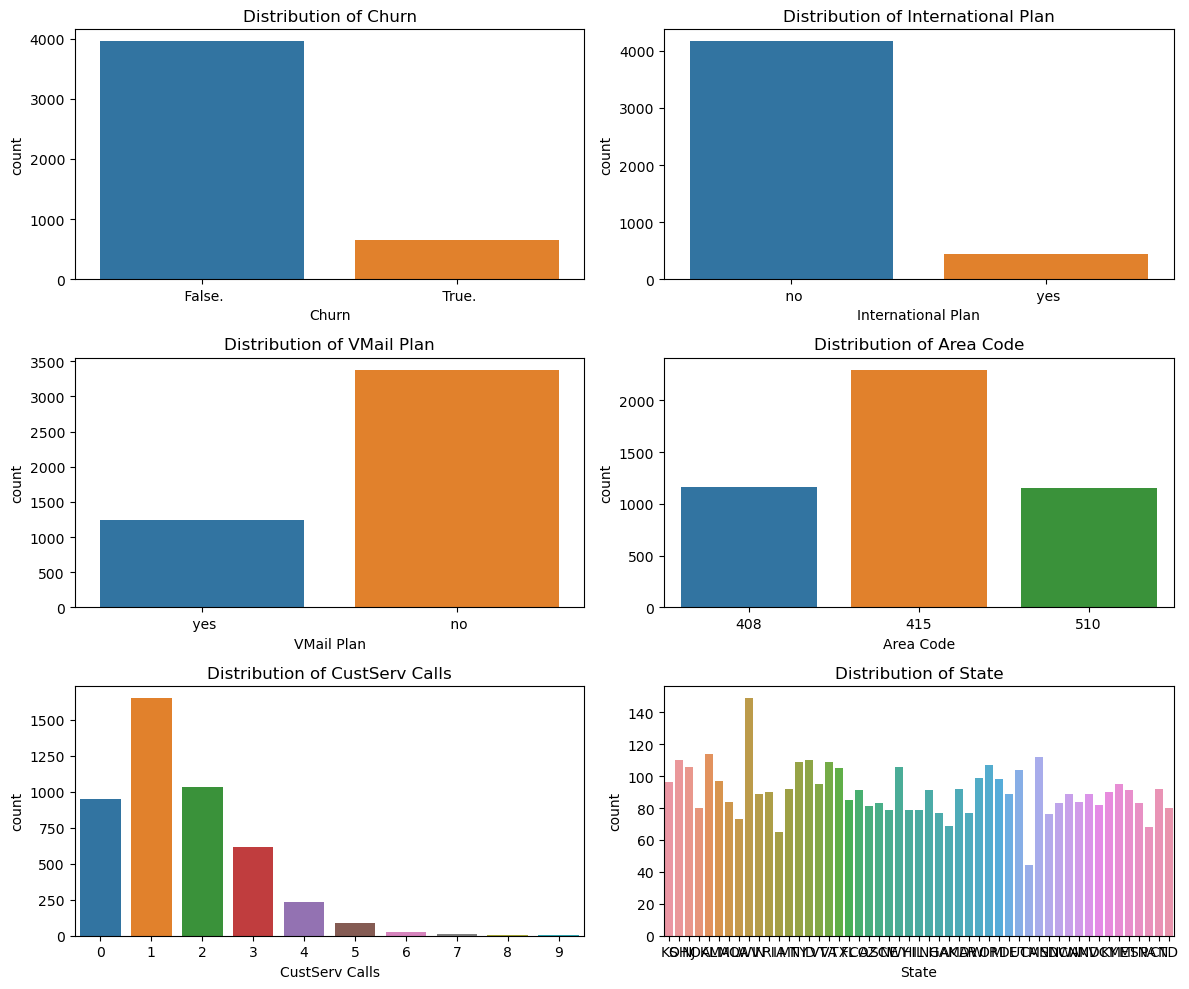

In [23]:
#1. Univariate Analysis
#categorical and discrete data
plt.figure(figsize=(12,10))
plotnumber = 1
for col in cat_discrete_col.columns:
    plt.subplot(3,2,plotnumber)
    sns.countplot(data = df, x=col)
    plt.title(f'Distribution of {col}')
    plotnumber = plotnumber + 1
plt.tight_layout()
plt.show()

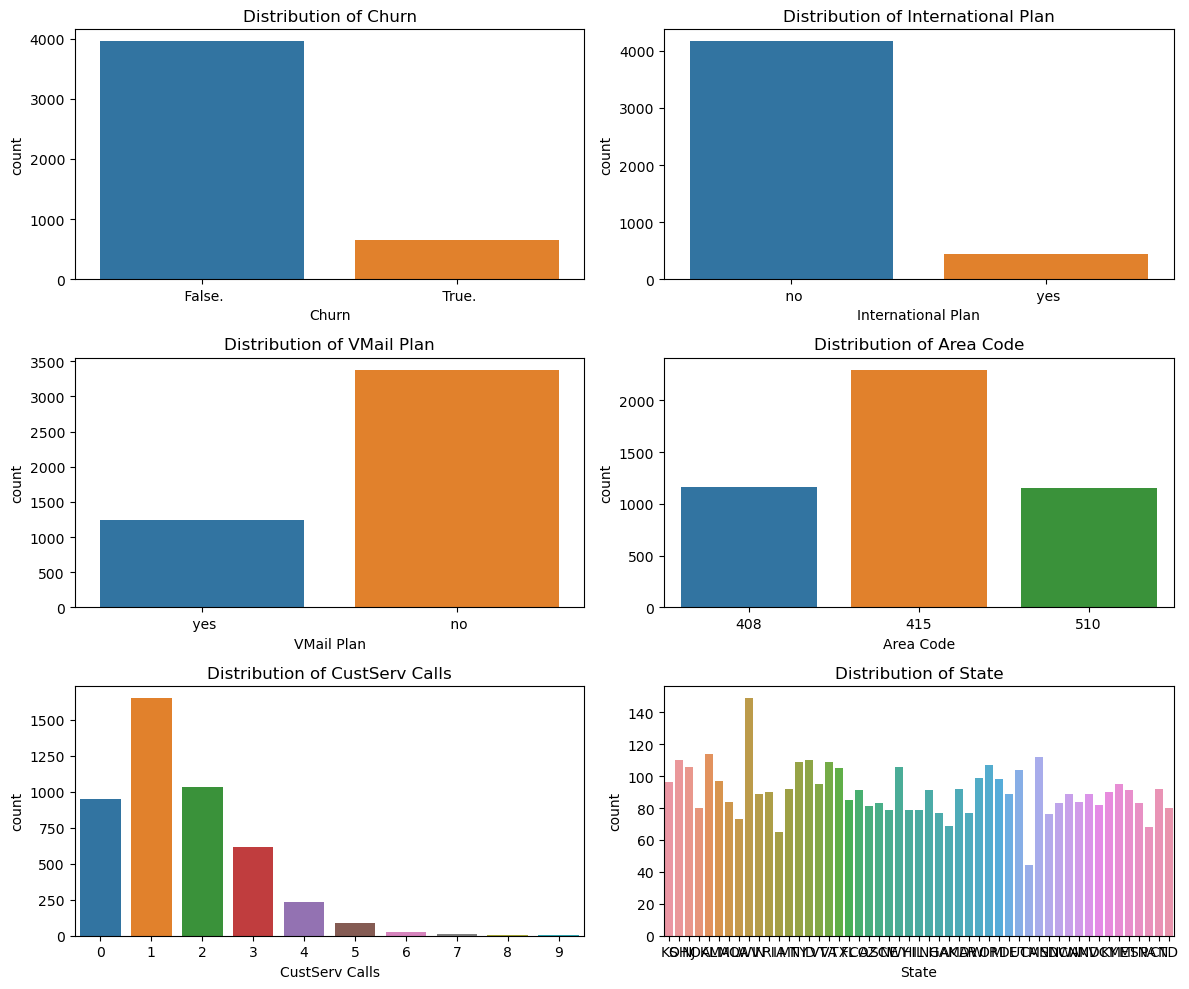

In [24]:
#1. Univariate Analysis
#categorical and discrete data
plt.figure(figsize=(12,10))
plotnumber = 1
for col in cat_discrete_col.columns:
    plt.subplot(3,2,plotnumber)
    sns.countplot(data = df, x=col)
    plt.title(f'Distribution of {col}')
    plotnumber = plotnumber + 1
plt.tight_layout()
plt.show()

## 2. Bivariate Analysis

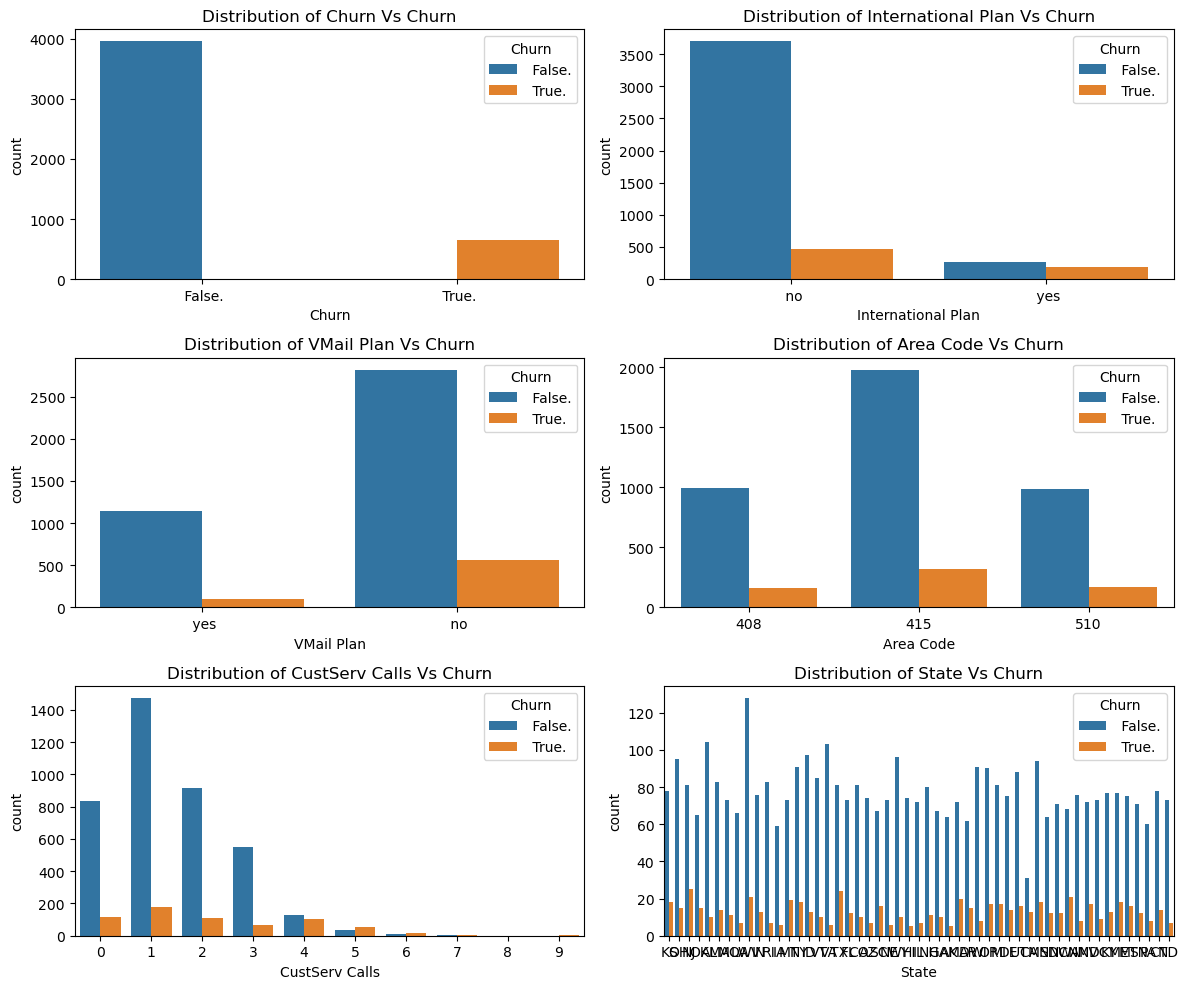

In [25]:

#categorical and discrete data
plt.figure(figsize=(12,10))
plotnumber = 1
for col in cat_discrete_col.columns:
    plt.subplot(3,2,plotnumber)
    sns.countplot(data = df, x=col, hue ="Churn")
    plt.title(f'Distribution of {col} Vs Churn')
    plotnumber = plotnumber + 1
plt.tight_layout()
plt.show()


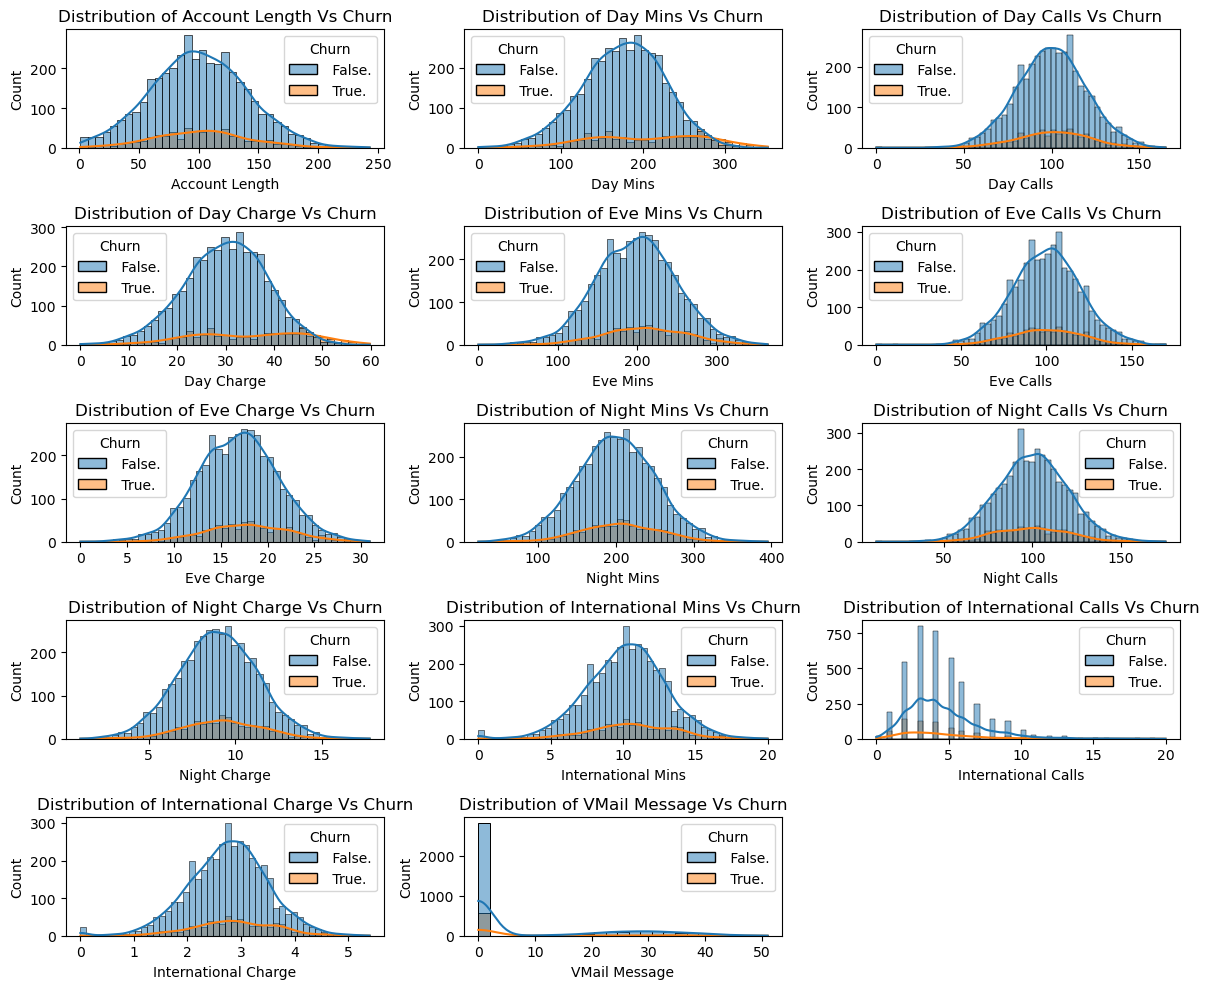

In [26]:
#numerical data
plt.figure(figsize=(12,10))
plotnumber = 1
for col in cont_cols.columns:
    plt.subplot(5,3,plotnumber)
    sns.histplot(data = df, x=col,hue ='Churn', kde = True)
    plt.title(f'Distribution of {col} Vs Churn')
    plotnumber = plotnumber + 1
plt.tight_layout()
plt.show()


# Data Preprocessing


## Handling Null Values

In [27]:
df.isnull().sum().sum()

0

### Conversion of categorical data to Numerical data¶

In [28]:
le = LabelEncoder()

In [29]:
df['International Plan'] = le.fit_transform(df['International Plan'])

In [30]:
df['VMail Plan'] = le.fit_transform(df['VMail Plan'])

In [31]:
df['State'] = le.fit_transform(df['State'])

In [32]:
df.Churn = df.Churn.replace({' False.': 0,' True.': 1})

In [33]:
df

,State,Account Length,Area Code,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,34,57,510,0,1,25,144.0,81,24.48,187.2,112,15.91,158.6,122,7.14,8.5,6,2.30,3,0
4613,32,177,408,0,1,29,189.0,91,32.13,303.1,96,25.76,163.6,116,7.36,15.7,1,4.24,3,0
4614,46,67,408,0,1,33,127.5,126,21.68,296.1,129,25.17,200.9,91,9.04,13.0,3,3.51,1,0
4615,22,98,415,0,1,23,168.9,98,28.71,226.3,117,19.24,165.5,96,7.45,14.3,3,3.86,0,0


# Feature selection

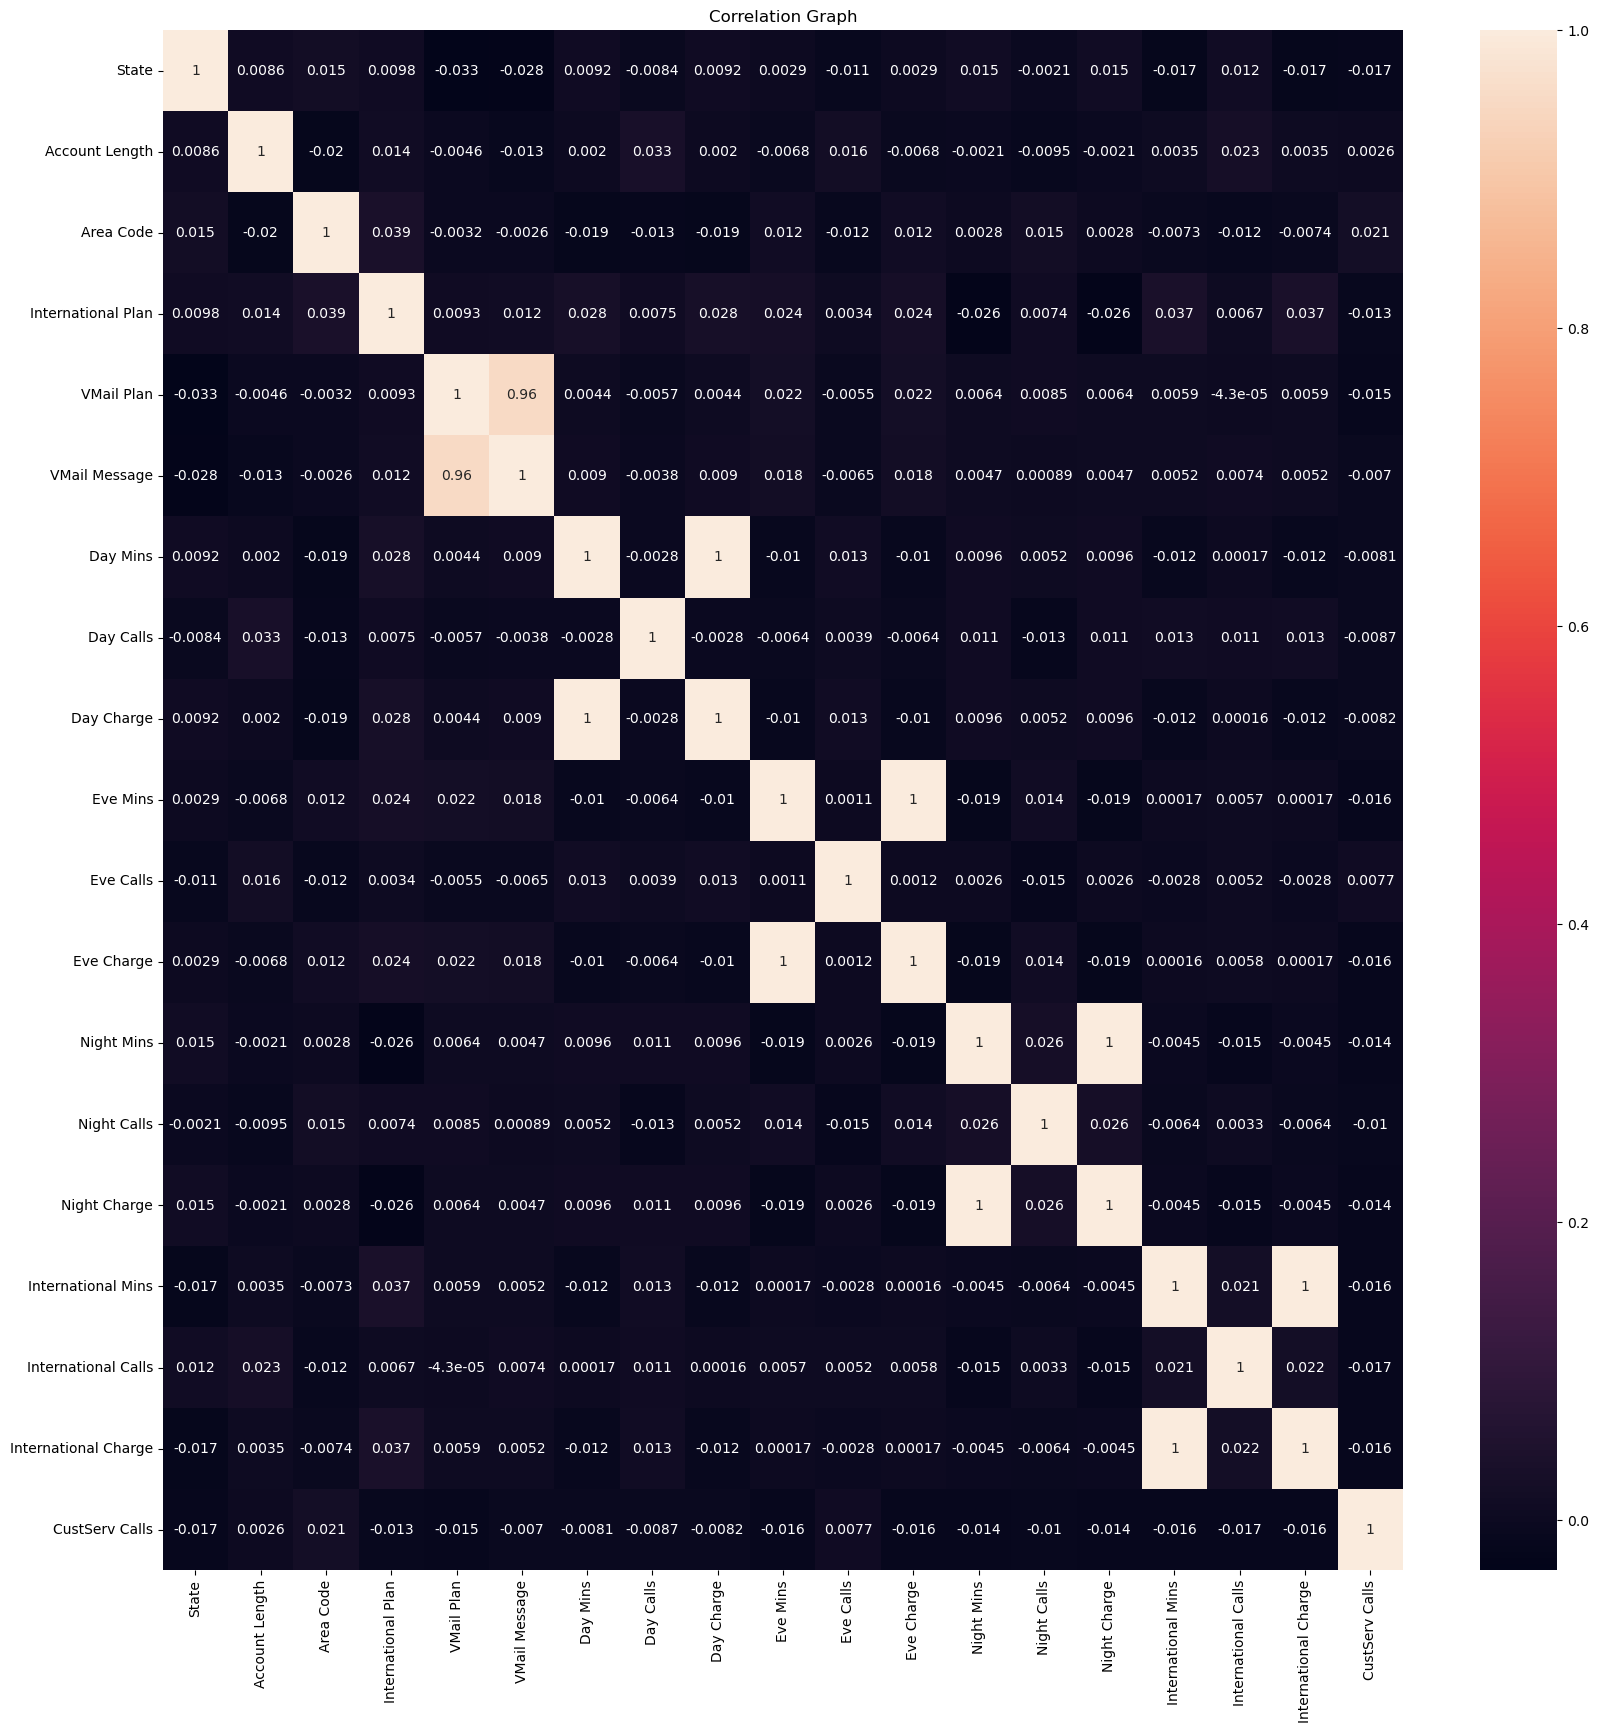

In [34]:
plt.figure(figsize =(20,20))
sns.heatmap(df.drop('Churn',axis = 1).corr(), annot = True)
plt.title('Correlation Graph')
plt.show()

In [35]:
#dropping the features with highest correlation pair
df.drop(['VMail Message','Day Mins','Eve Mins','Night Mins','International Mins'], axis = 1, inplace = True)

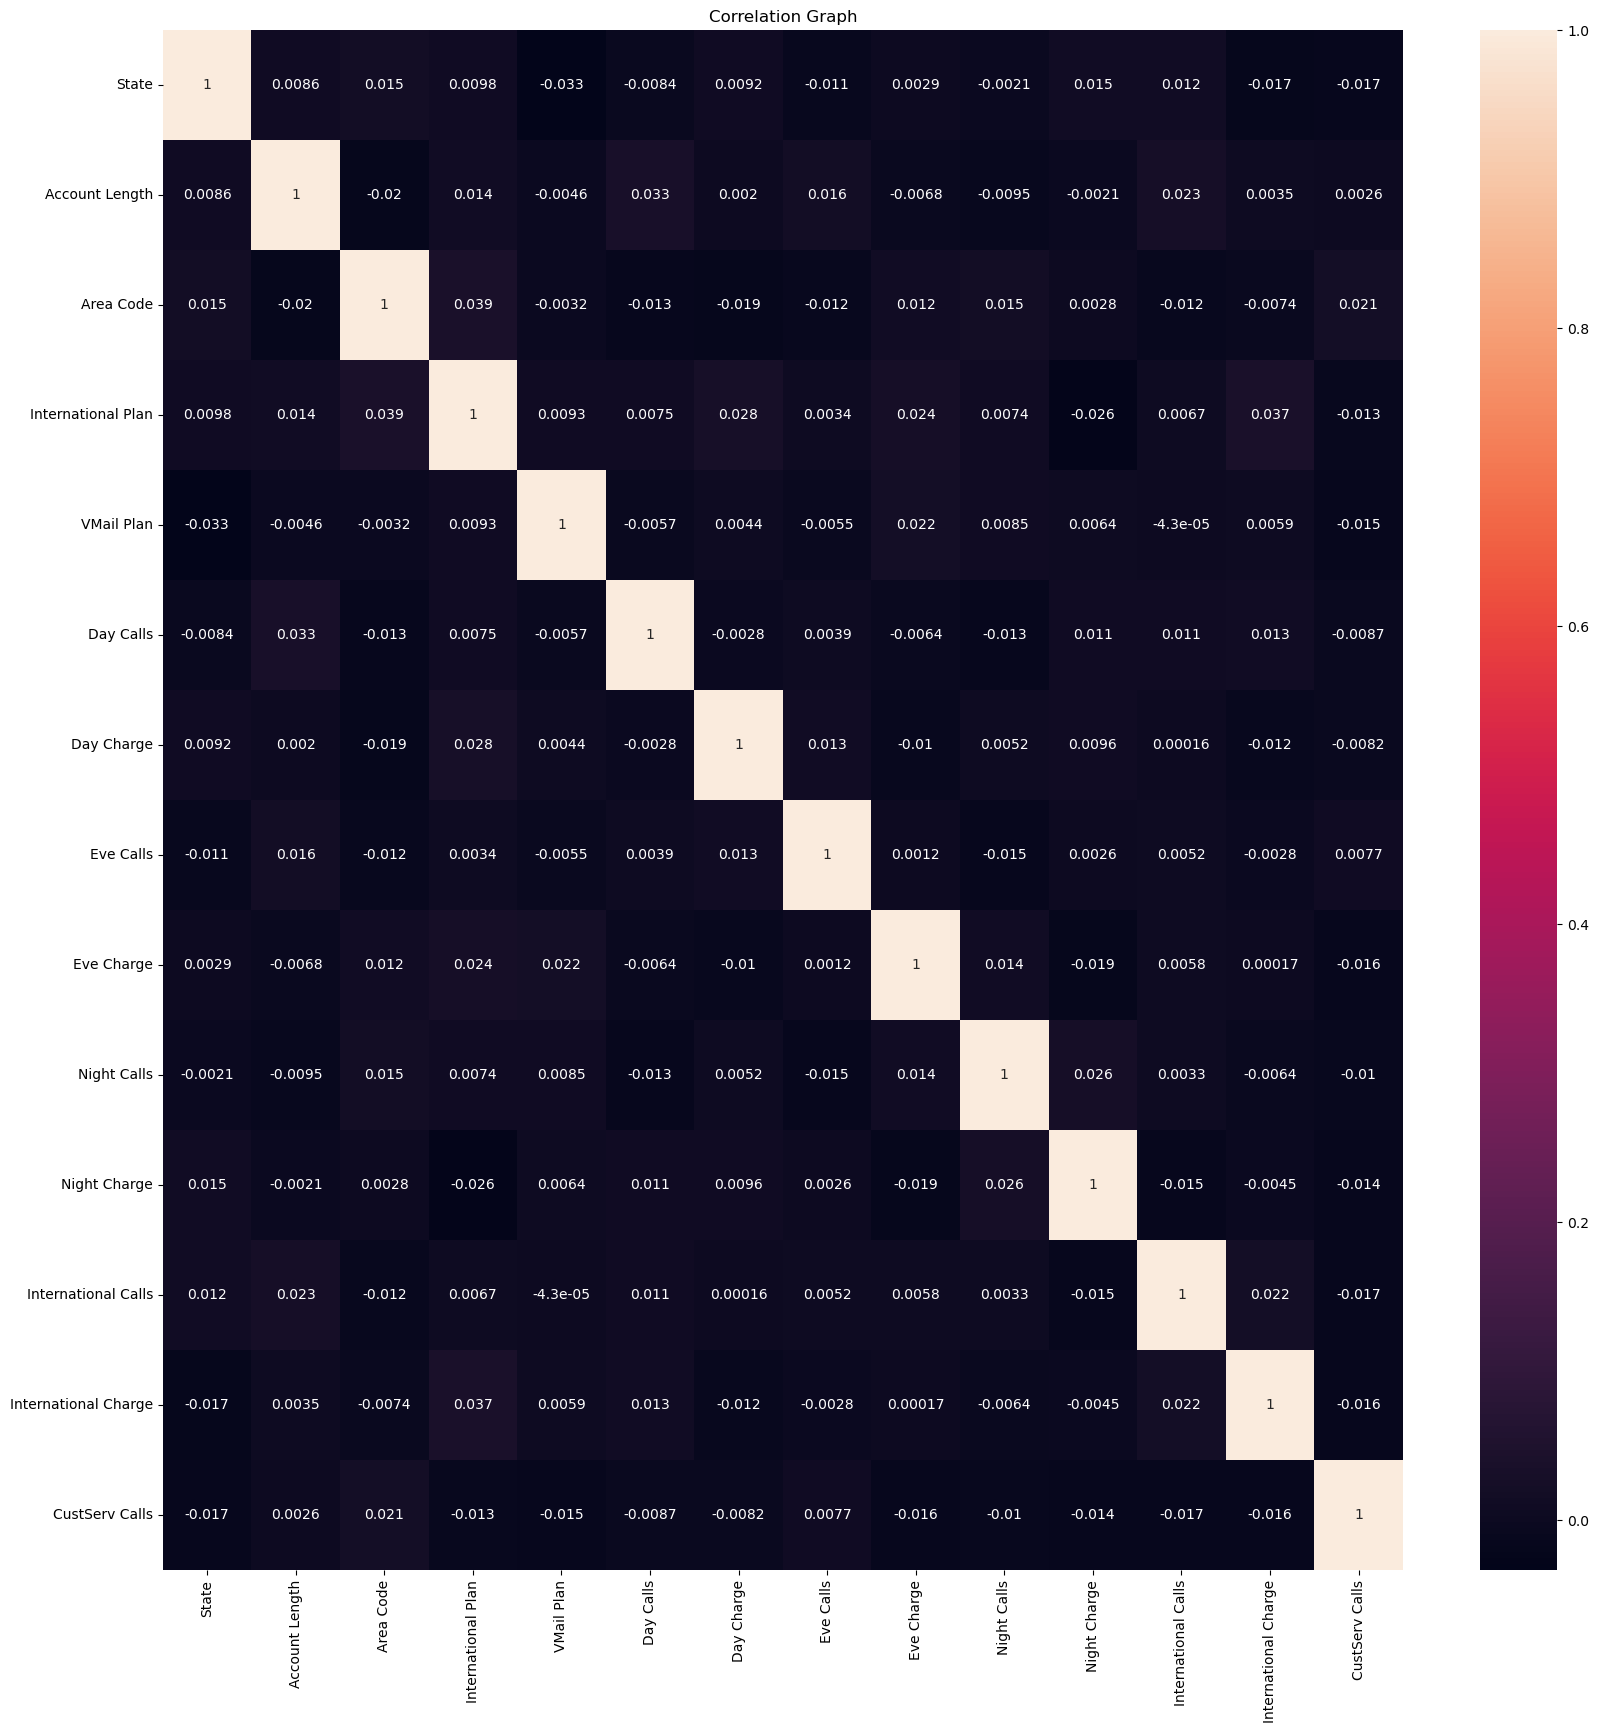

In [36]:
plt.figure(figsize =(20,20))
sns.heatmap(df.drop('Churn',axis = 1).corr(), annot = True)
plt.title('Correlation Graph')
plt.show()

# splitting data¶

In [37]:
x = df.drop('Churn', axis = 1)

In [38]:
y = df.Churn
y

0       0
1       0
2       0
3       0
4       0
       ..
4612    0
4613    0
4614    0
4615    0
4616    0
Name: Churn, Length: 4617, dtype: int64

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)

# Scaling

In [40]:
scaler = StandardScaler() 

In [41]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [42]:
x_train_scaled= pd.DataFrame(data = x_train_scaled, columns = x_train.columns)
x_train_scaled

,State,Account Length,Area Code,International Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,International Calls,International Charge,CustServ Calls
0,1.610262,0.347848,-0.512707,-0.318033,1.615553,-1.065490,-1.024639,0.250150,-0.445306,-0.528694,0.639961,-0.580695,0.959283,-0.437298
1,0.046238,-1.218901,-0.679552,3.144327,-0.618983,-2.022985,-0.666518,1.463490,1.905321,0.869349,-0.126619,-0.580695,0.784741,-0.437298
2,0.998252,0.726900,-0.679552,-0.318033,-0.618983,-0.359967,-2.375484,0.856820,-1.414444,-1.826876,-1.178438,3.059073,-0.302785,-0.437298
3,0.046238,0.069876,1.751616,-0.318033,-0.618983,-0.813517,-0.258326,-0.457631,-0.156428,0.769489,-0.652528,0.632561,-0.920392,-0.437298
4,-0.497771,-0.486067,1.751616,-0.318033,-0.618983,-1.166279,0.745283,-0.659854,-1.025391,0.020537,-0.331634,-0.580695,-0.960671,0.327698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3457,1.134254,-0.208095,1.751616,-0.318033,-0.618983,-0.712728,1.103404,-1.064300,-1.833783,1.069069,-0.879828,-0.176276,-0.987524,-0.437298
3458,-1.177781,0.802710,1.751616,-0.318033,1.615553,0.143978,0.844338,1.261267,-0.368427,0.120398,1.170328,0.228143,0.100003,1.092694
3459,-0.089765,-0.814579,-0.512707,-0.318033,-0.618983,-0.359967,-1.599374,-1.013745,-1.041698,-0.728414,0.261128,-0.985113,-0.047686,-1.202294
3460,-0.157766,-0.031204,-0.679552,-0.318033,-0.618983,-2.476536,0.235859,0.856820,0.789414,-0.378903,-1.098215,-0.176276,0.704184,-0.437298


In [43]:
x_test_scaled= pd.DataFrame(data = x_test_scaled, columns = x_test.columns)
x_test_scaled

,State,Account Length,Area Code,International Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,International Calls,International Charge,CustServ Calls
0,-1.013513,-2.116521,-0.709313,-0.353037,-0.561685,-0.139505,0.313135,0.322978,0.052814,0.203528,0.020974,-0.592217,-0.616051,1.107925
1,-1.613346,-0.804346,-0.547327,-0.353037,-0.561685,0.510810,0.932130,-0.680492,-2.427643,0.203528,0.879946,-0.177414,1.014621,-0.423677
2,1.119227,-0.173493,1.651057,-0.353037,-0.561685,-2.140474,-0.114475,0.874887,1.579605,-0.357510,-0.072117,-1.007020,-0.252182,-1.189477
3,0.985931,0.230253,-0.547327,-0.353037,-0.561685,0.160641,-1.296691,0.072111,-1.255865,0.203528,-0.215984,0.652192,-0.979920,0.342124
4,0.652690,-0.223961,-0.547327,-0.353037,1.780358,-0.489674,-0.518025,0.072111,1.312765,1.478616,1.256539,0.237389,0.327313,4.171127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,-1.546698,-1.132390,-0.547327,-0.353037,1.780358,-2.140474,0.530767,1.577316,0.639863,0.815570,-1.751978,0.237389,-0.467808,-0.423677
1151,-1.613346,-0.173493,-0.547327,-0.353037,-0.561685,0.810956,0.924475,0.473499,0.027290,0.203528,-0.562958,0.652192,1.378490,-0.423677
1152,0.319449,-2.091287,-0.709313,-0.353037,-0.561685,-0.089481,0.110813,-2.185697,1.052885,1.325605,0.249469,1.066996,1.526733,0.342124
1153,-1.346754,0.835872,-0.547327,2.832567,-0.561685,2.561804,-0.055419,-0.881186,0.164191,0.662560,0.672608,0.237389,0.259930,0.342124


# Balancing

In [44]:
sm = SMOTE()

In [45]:
x_sm,y_sm = sm.fit_resample(x_train_scaled,y_train)

In [46]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_sm))

Counter({0: 2963, 1: 499})
Counter({0: 2963, 1: 2963})


# model